# Logistic Regression in SciKit Learn - Lab

## Introduction 

In this lab, we are going to fit a logistic regression model to a dataset concerning heart disease. Whether or not a patient has heart disease is indicated in the final column labelled 'target'. 1 is for positive for heart disease while 0 indicates no heart disease.

## Objectives
You will be able to:

* Understand and implement logistic regression
* Compare testing and training errors

## Let's get started!

- age - age in years
- sex - sex (1 = male; 0 = female)
- cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - the predicted attribute - diagnosis of heart disease (1 = positive for heart disease, 0 = no heart disease)

In [74]:
#Starter Code
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
#Starter Code
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Define appropriate X and y
Recall the dataset is whether or not a patient has heart disease and is indicated in the final column labelled 'target'. With that, define appropriate X and y in order to model whether or not a patient has heart disease.

In [76]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [88]:
df.shape

(303, 14)

In [77]:
#Your code here 
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
y = df.target

## Normalize the Data
Normalize the data prior to fitting the model.

In [78]:
# check for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

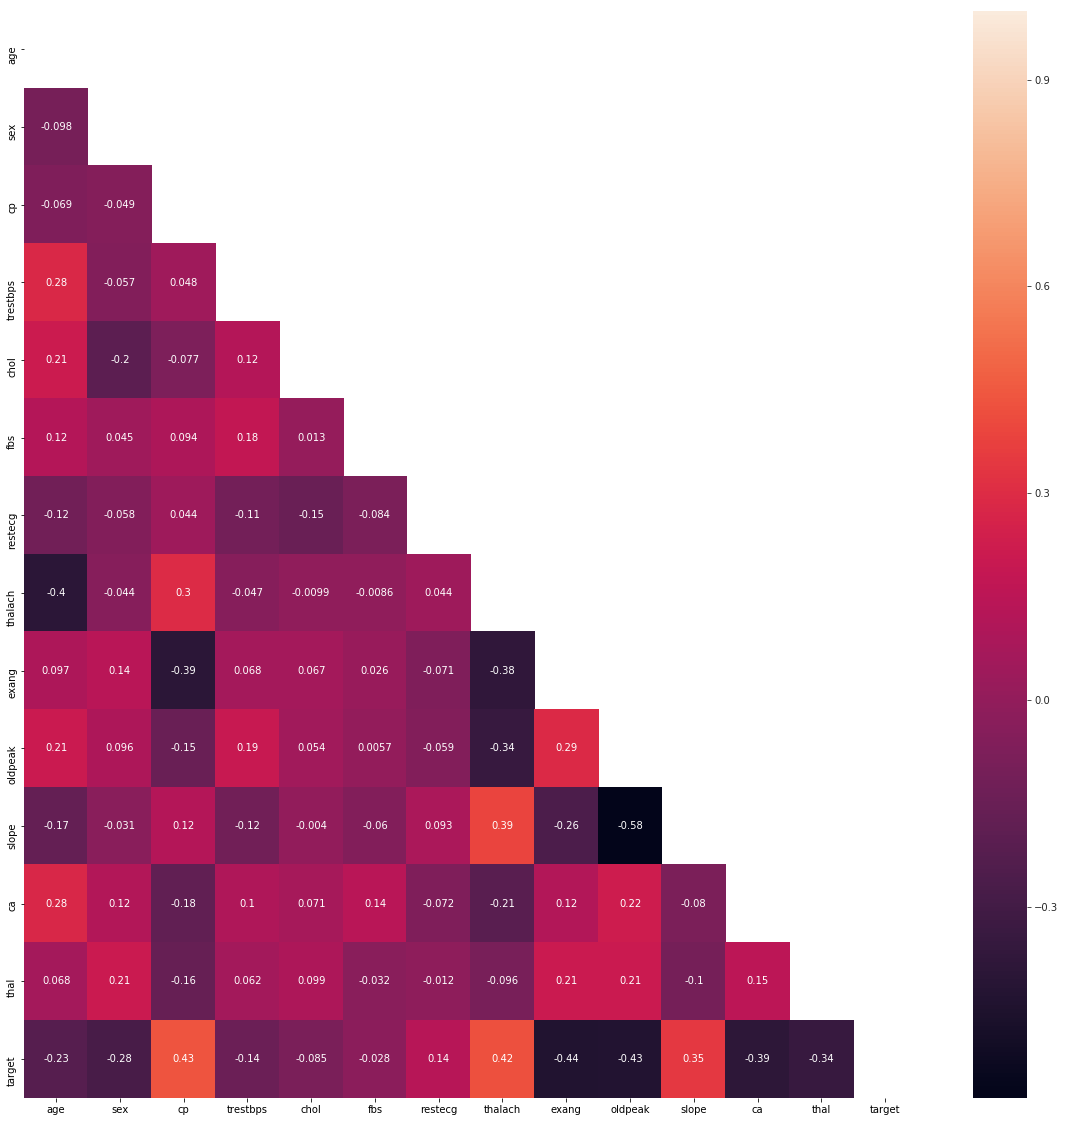

In [79]:
plt.subplots(figsize=(20, 20))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, annot=True)

In [80]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [81]:
#Your code here
for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col]))

In [82]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Train Test Split
Split the data into train and test sets.

In [89]:
#Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Fit a model
Fit an intial model to the training set. In SciKit Learn you do this by first creating an instance of the regression class. From there, then use the **fit** method from your class instance to fit a model to the training data.

In [84]:
#Your code here
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model_log = logreg.fit(X_train, y_train)
model_log

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Predict
Generate predictions for the train and test sets. Use the **predict** method from the logreg object.

In [85]:
#Your code here
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [86]:
residuals = y_train - y_hat_train
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    227
Name: target, dtype: int64
0    1.0
Name: target, dtype: float64


In [87]:
residuals = y_test - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    76
Name: target, dtype: int64
0    1.0
Name: target, dtype: float64


## Initial Evaluation
How many times was the classifier correct for the training set?

In [ ]:
#Your code here
# The classifier was correct 100% of the time for the training set.

## How many times was the classifier correct for the test set?

In [ ]:
#Your code here
# The classifier was correct 100% of the time for the test set.

## Analysis
Describe how well you think this initial model is based on the train and test performance. Within your description, make note of how you evaluated performance as compared to our previous work with regression.

In [ ]:
#Your answer here


## Summary

In this lab, you practiced a standard data science pipeline, importing data, splitting into train and test sets and fitting a logistic regression model. In the upcoming labs and lessons, we'll continue to investigate how to analyze and tune these models for various scenarios.